In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
data.drop('Car_Name', axis=1, inplace=True)
data.head()
data.info

<bound method DataFrame.info of      Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0    2014           3.35           5.59       27000    Petrol      Dealer   
1    2013           4.75           9.54       43000    Diesel      Dealer   
2    2017           7.25           9.85        6900    Petrol      Dealer   
3    2011           2.85           4.15        5200    Petrol      Dealer   
4    2014           4.60           6.87       42450    Diesel      Dealer   
..    ...            ...            ...         ...       ...         ...   
296  2016           9.50          11.60       33988    Diesel      Dealer   
297  2015           4.00           5.90       60000    Petrol      Dealer   
298  2009           3.35          11.00       87934    Petrol      Dealer   
299  2017          11.50          12.50        9000    Diesel      Dealer   
300  2016           5.30           5.90        5464    Petrol      Dealer   

    Transmission  Owner  
0         Manual 

In [39]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [40]:
data['Years old'] = 2022 - data.Year     
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [41]:
data.drop('Year', axis=1, inplace=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [42]:
data = pd.get_dummies(data,drop_first=True)
data.head()
#Always n-1 dummy variables are made

,Selling_Price,Present_Price,Kms_Driven,Owner,Years old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


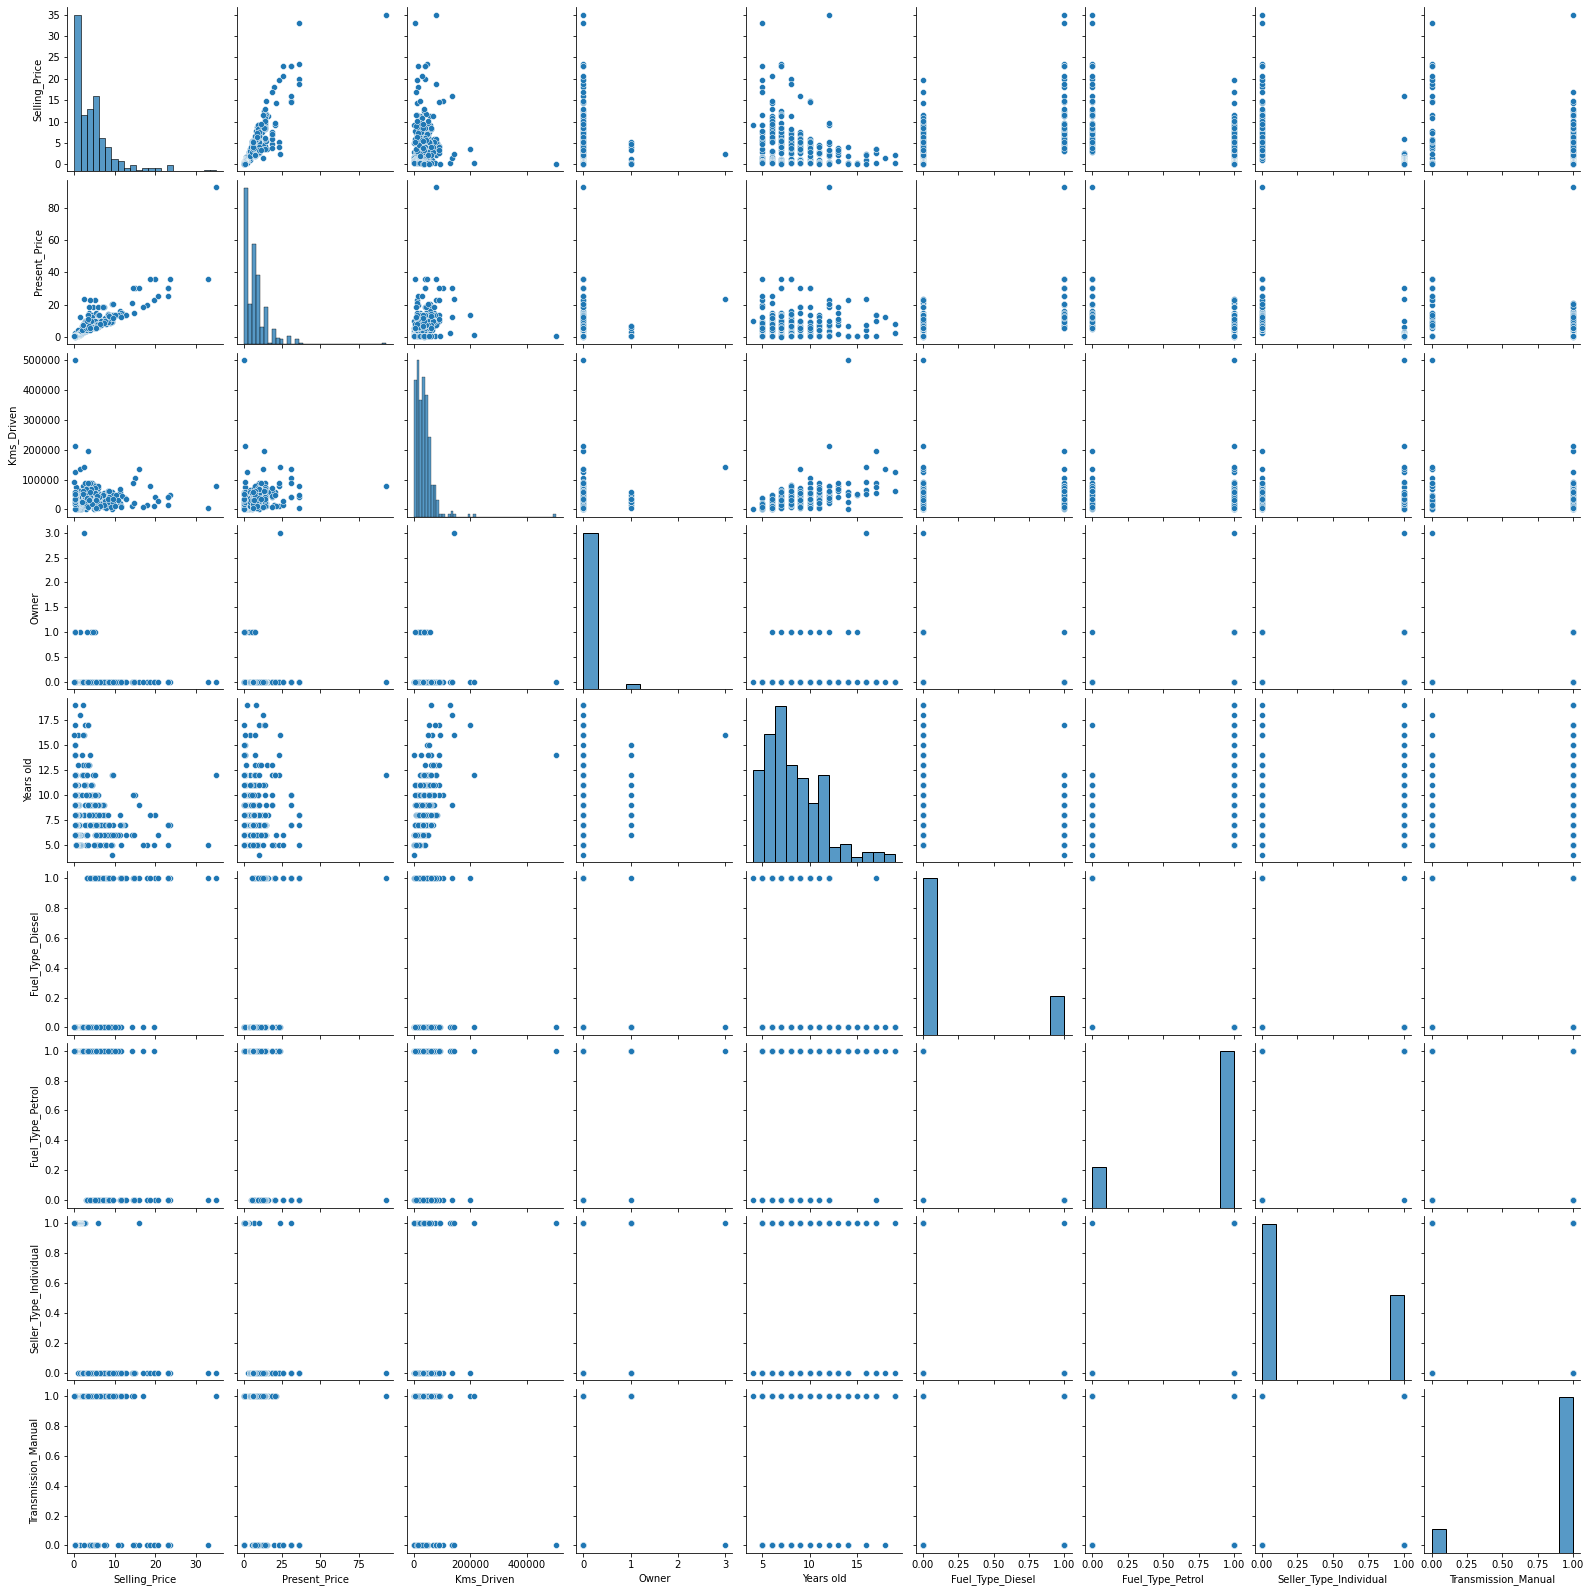

In [43]:
sns.pairplot(data);

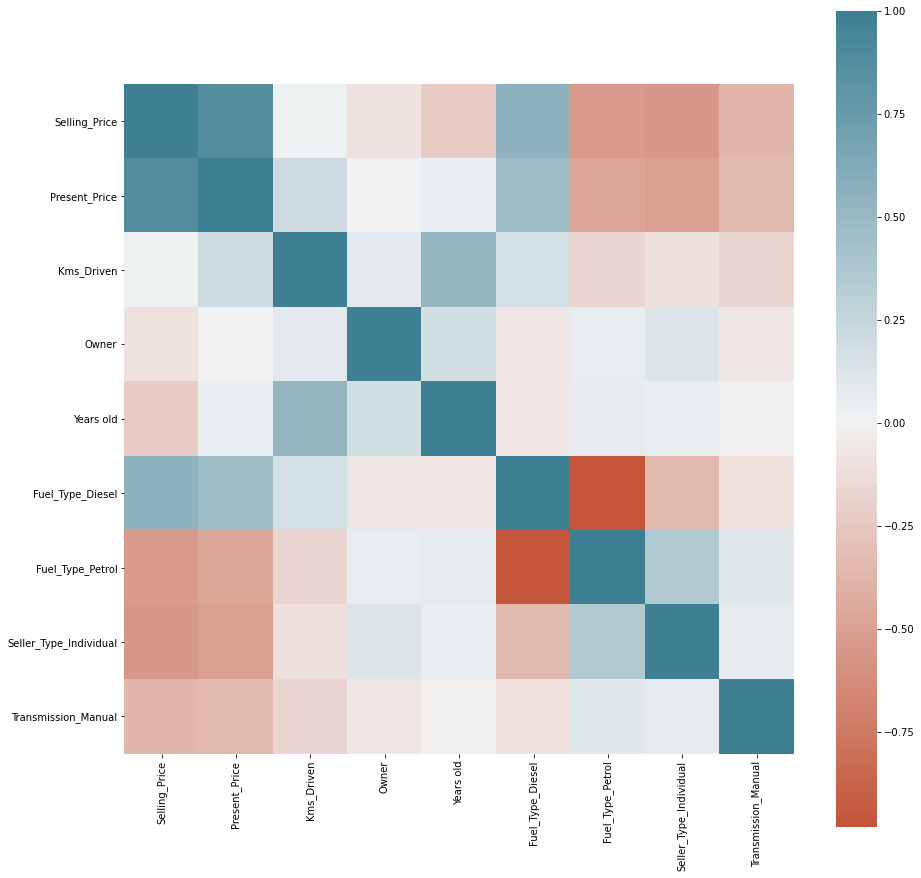

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(
    data.corr(), 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
);

In [45]:
x = data.drop('Selling_Price', axis = 1)
y = data['Selling_Price']
print(x.shape)
print(y.shape)

(301, 8)
(301,)


In [46]:
from sklearn.ensemble import ExtraTreesRegressor #WIll help us figureout important features
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [47]:
model.feature_importances_ #Feature engineering

array([4.26854439e-01, 3.96113357e-02, 3.59907926e-04, 8.06406314e-02,
       2.00924817e-01, 1.25755404e-02, 1.10528042e-01, 1.28505287e-01])

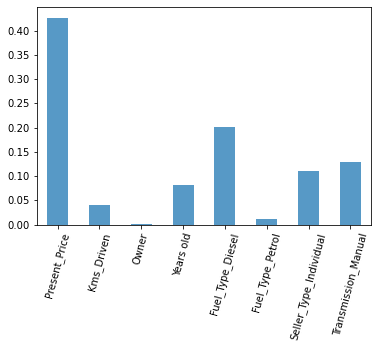

In [48]:
pd.Series(model.feature_importances_, index=x.columns).plot(kind='bar', alpha=0.75,rot=75);

In [49]:
#Model Training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.914434297222852

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [52]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
    
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result
  

In [53]:
perfect_model(x, y)

C:\Users\sarthak\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{'normalize': False}, {'splitter': 'best', 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'mse'}, {'n_estimators': 60, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}]


,model,best_score,best_params
0,Linear_Regression,0.850996,{'normalize': False}
1,Decision_Tree,0.940813,"{'splitter': 'best', 'min_samples_leaf': 2, 'm..."
2,Random_forest,0.843585,"{'n_estimators': 60, 'min_samples_split': 2, '..."


In [54]:
final_rf_model = RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.9562189741506444

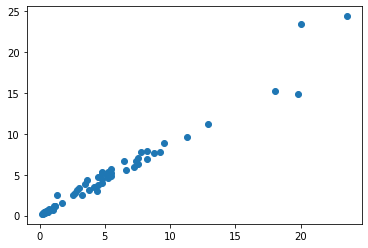

In [55]:
predictions=final_rf_model.predict(x_test)
plt.scatter(y_test,predictions)

In [56]:
import pickle
with open('RF_price_predicting_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(final_rf_model, file)